In [1]:
%cd ..

/media/Z/NDT/Transformer_Tabular


In [2]:
import warnings
warnings.filterwarnings('ignore')
from FTTransformer.model import FT_Transformer
from configs import *
import pandas as pd
from yaml.loader import SafeLoader
import typing
import yaml
import numpy as np
import matplotlib.pyplot as plt

2023-01-25 09:01:03.138694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 09:01:03.262609: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-25 09:01:03.266154: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-01-25 09:01:03.266175: I tensorflow/compiler/xla/s

In [3]:
def load_config(path: str) -> typing.Dict:
    with open(path, "r") as f:
        config = yaml.load(f, Loader=SafeLoader)
    return config

# Utility function
def get_model_importances(importances, title="Importances"):
    imps_sorted = importances.mean().sort_values(ascending=False)
    
    plt.figure(figsize=(15,7))
    ax = imps_sorted.plot.bar()
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(), 4)), (p.get_x(), p.get_height() * 1.01))
    plt.title(title)
    plt.show()
    
    return imps_sorted

# A. Periodic Embeddings

In [ ]:
hypeparameter = load_config('setting/hyp_periodic_fttransformer.yaml')

In [ ]:
X_train= pd.read_csv(PATH_TRAIN)
X_val=pd.read_csv(PATH_VAL)
X_test=pd.read_csv(PATH_TEST)

In [ ]:
model_periodic = FT_Transformer(
   c_feature=CATEGORICAL_FEATURES, 
   n_feature=NUMERIC_FEATURES,
   X_train=X_train,
   hyperparameters=hypeparameter
)

2023-01-25 09:01:21.506842: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-01-25 09:01:21.507419: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-01-25 09:01:21.507862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-01-25 09:01:21.512514: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library '

## 1. Training

In [ ]:
history = model_periodic.train(
    train_data=X_train,
    val_data=X_val,
)

>> Training ................
Epoch 1/100
50/51 [============================>.] - ETA: 0s - loss: 0.4743 - output_loss: 0.4743 - output_PR AUC: 0.4801
Epoch 1: saving model to artifact/weights/periodic_fft_transform_1674655286.1900282/
51/51 [==============================] - 8s 75ms/step - loss: 0.4734 - output_loss: 0.4734 - output_PR AUC: 0.4829 - val_loss: 0.3960 - val_output_loss: 0.3960 - val_output_PR AUC: 0.6457
Epoch 2/100
50/51 [============================>.] - ETA: 0s - loss: 0.3984 - output_loss: 0.3984 - output_PR AUC: 0.6151
Epoch 2: saving model to artifact/weights/periodic_fft_transform_1674655286.1900282/
51/51 [==============================] - 3s 64ms/step - loss: 0.3978 - output_loss: 0.3978 - output_PR AUC: 0.6150 - val_loss: 0.3885 - val_output_loss: 0.3885 - val_output_PR AUC: 0.6728
Epoch 3/100
50/51 [============================>.] - ETA: 0s - loss: 0.3811 - output_loss: 0.3811 - output_PR AUC: 0.6481
Epoch 3: saving model to artifact/weights/periodic_fft_tran

## 2. Evaluation

In [ ]:
model_periodic.load_model('artifact/weights/periodic_fft_transform_1674655286.1900282/')

In [ ]:
model_periodic.test_model(test_data=X_test)

32/32 [==============================] - 1s 23ms/step
Test ROC AUC: 0.8925
Test PR AUC: 0.7275
Test Accuracy: 0.8443
F1 score: 0.765
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



In [ ]:
import pickle
import matplotlib.pyplot as plt
with open('artifact/history/periodic_fft_transform_1674655286.1900282.pkl', 'rb') as f:
    history = pickle.load(f)

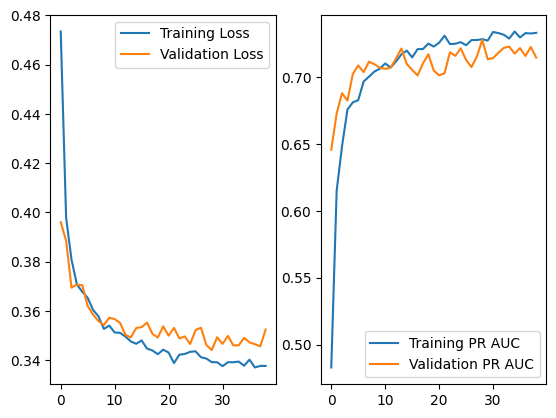

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(history['loss'], label='Training Loss')
ax[0].plot(history['val_loss'], label='Validation Loss')
ax[0].legend()

ax[1].plot(history['output_PR AUC'], label='Training PR AUC')
ax[1].plot(history['val_output_PR AUC'], label='Validation PR AUC')
ax[1].legend()

plt.show()


## 3. Explainable

In [ ]:
model_periodic.load_model('artifact/weights/linear_fft_transform_1674641988.5785031/')

In [ ]:
preds = model_periodic.inference(X_test)

32/32 [==============================] - 1s 31ms/step


In [ ]:
importances = preds['importances']

In [ ]:
linear_importances_df = pd.DataFrame(importances[:, :-1], columns = FEATURES)

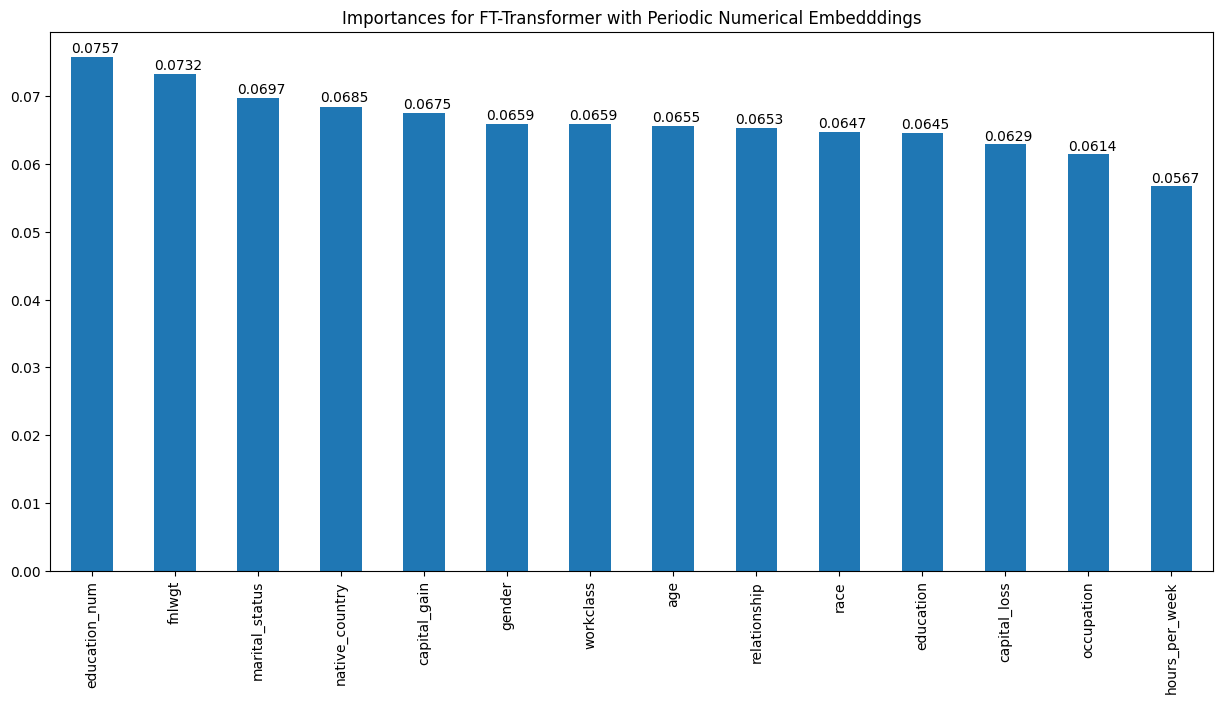

In [ ]:
linear_total_importances = get_model_importances(
    linear_importances_df, title="Importances for FT-Transformer with Periodic Numerical Embedddings"
)

In [ ]:
# Largest prediction
max_idx = np.argsort(preds['output'].ravel())[-1]
example_importance_linear = linear_importances_df.iloc[max_idx, :].sort_values(ascending=False).rename("Importance").to_frame().join(
    X_test.iloc[max_idx, :].rename("Example Value")
).head(5)
print(f"Top 5 contributions to row {max_idx} which was scored {str(np.round(preds['output'].ravel()[max_idx], 4))}")
display(example_importance_linear)

# Smallest one
min_idx = np.argsort(preds['output'].ravel())[0]
example_importance_linear = linear_importances_df.iloc[min_idx, :].sort_values(ascending=False).rename("Importance").to_frame().join(
    X_test.iloc[min_idx, :].rename("Example Value")
).head(5)
print(f"Top 5 contributions to row {min_idx} which was scored {str(np.round(preds['output'].ravel()[min_idx], 4))}")
display(example_importance_linear)

Top 5 contributions to row 13929 which was scored 0.9217


,Importance,Example Value
fnlwgt,0.096278,161902
capital_loss,0.067985,0
capital_gain,0.066931,0
native_country,0.065509,United-States
age,0.063792,21


Top 5 contributions to row 928 which was scored 0.0027


,Importance,Example Value
gender,0.075674,Male
capital_gain,0.073888,0
relationship,0.070701,Husband
education,0.070200,10th
race,0.069150,White


## 4. Inferences

In [ ]:
inputs = {
    'age': 25.0,
    'workclass': 'Private',
    'fnlwgt': 226802.0,
    'education': '11th',
    'education_num': 7.0,
    'marital_status': 'Never-married',
    'occupation': 'Machine-op-inspct',
    'relationship': 'Own-child',
    'race': 'black',
    'gender': 'Male',
    'capital_gain': 0.0,
    'capital_loss': 0.0,
    'hours_per_week': 40.0,
    'native_country': 'United-States',
    'income_bracket': ''
}

In [ ]:
preds = model_periodic.inference(inputs)
score = preds['output']
importance = preds['importances']

1/1 [==============================] - 0s 406ms/step


In [ ]:
importances_df = pd.DataFrame(importance[:, :-1], columns = FEATURES)

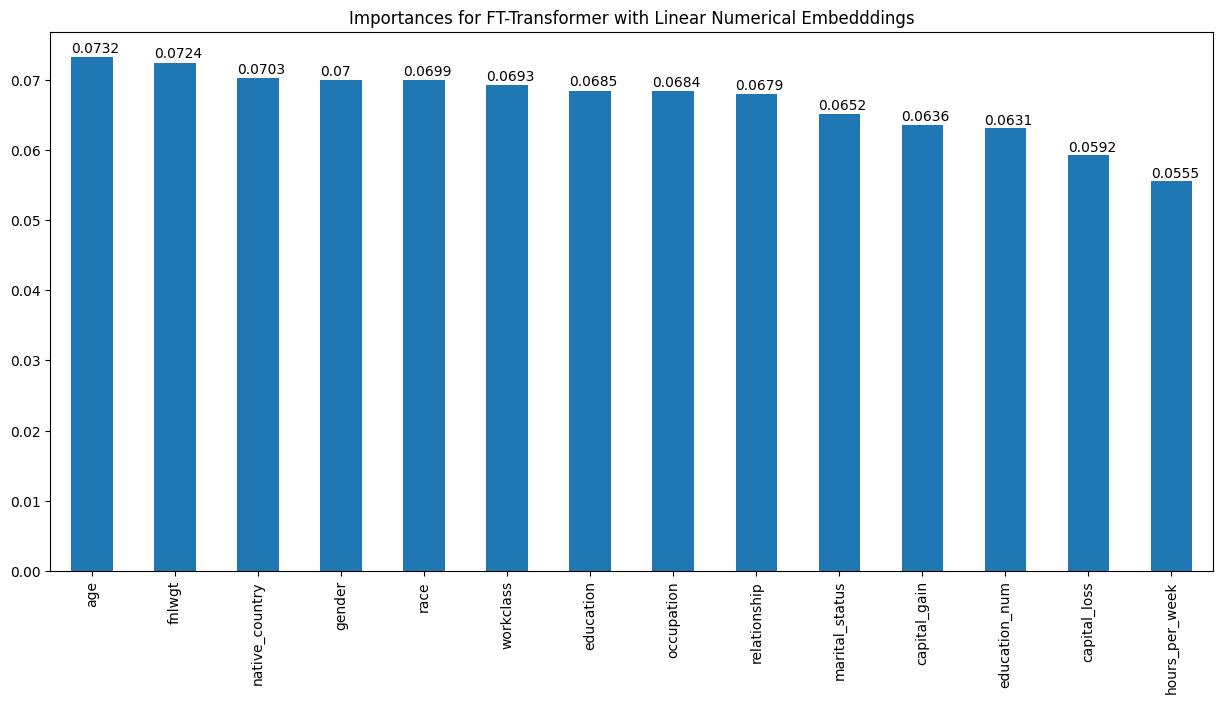

In [ ]:
linear_total_importances = get_model_importances(
    importances_df, title="Importances for FT-Transformer with Linear Numerical Embedddings"
)

# B. PLE with Quantile Binning Embeddings

In [24]:
hypeparameter = load_config('setting/hyp_ple_fttransformer.yaml')

In [25]:
X_train= pd.read_csv(PATH_TRAIN)
X_val=pd.read_csv(PATH_VAL)
X_test=pd.read_csv(PATH_TEST)

In [27]:
model_ple = FT_Transformer(
   c_feature=CATEGORICAL_FEATURES, 
   n_feature=NUMERIC_FEATURES,
   X_train=X_train,
   hyperparameters=hypeparameter
)

## 1. Training

In [28]:
history = model_ple.train(
    train_data=X_train,
    val_data=X_val,
)

>> Training ................
Epoch 1/100
50/51 [============================>.] - ETA: 0s - loss: 0.6460 - output_loss: 0.6460 - output_PR AUC: 0.2456
Epoch 1: saving model to artifact/weights/ple_fft_transform_1674655667.5672317/
51/51 [==============================] - 34s 275ms/step - loss: 0.6435 - output_loss: 0.6435 - output_PR AUC: 0.2458 - val_loss: 0.5169 - val_output_loss: 0.5169 - val_output_PR AUC: 0.5543
Epoch 2/100
50/51 [============================>.] - ETA: 0s - loss: 0.4600 - output_loss: 0.4600 - output_PR AUC: 0.5300
Epoch 2: saving model to artifact/weights/ple_fft_transform_1674655667.5672317/
51/51 [==============================] - 4s 75ms/step - loss: 0.4591 - output_loss: 0.4591 - output_PR AUC: 0.5319 - val_loss: 0.3871 - val_output_loss: 0.3871 - val_output_PR AUC: 0.6790
Epoch 3/100
50/51 [============================>.] - ETA: 0s - loss: 0.3744 - output_loss: 0.3744 - output_PR AUC: 0.6610
Epoch 3: saving model to artifact/weights/ple_fft_transform_1674655

## 2. Evaluation

In [29]:
model_ple.load_model('artifact/weights/ple_fft_transform_1674655667.5672317/')

In [30]:
model_ple.test_model(test_data=X_test)

32/32 [==============================] - 12s 37ms/step
Test ROC AUC: 0.9117
Test PR AUC: 0.7879
Test Accuracy: 0.86
F1 score: 0.7942
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.74      0.62      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.78      0.79     16281
weighted avg       0.85      0.86      0.86     16281



In [31]:
import pickle
import matplotlib.pyplot as plt
with open('artifact/history/ple_fft_transform_1674655667.5672317.pkl', 'rb') as f:
    history = pickle.load(f)

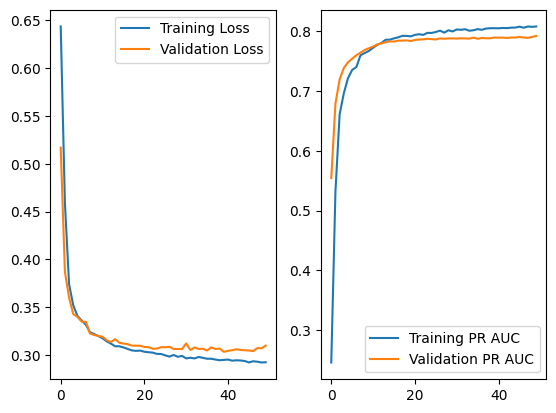

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(history['loss'], label='Training Loss')
ax[0].plot(history['val_loss'], label='Validation Loss')
ax[0].legend()

ax[1].plot(history['output_PR AUC'], label='Training PR AUC')
ax[1].plot(history['val_output_PR AUC'], label='Validation PR AUC')
ax[1].legend()

plt.show()


## 3. Explainable

In [33]:
model_ple.load_model('artifact/weights/ple_fft_transform_1674655667.5672317/')

In [34]:
preds = model_ple.inference(X_test)

32/32 [==============================] - 11s 27ms/step


In [35]:
importances = preds['importances']

In [36]:
linear_importances_df = pd.DataFrame(importances[:, :-1], columns = FEATURES)

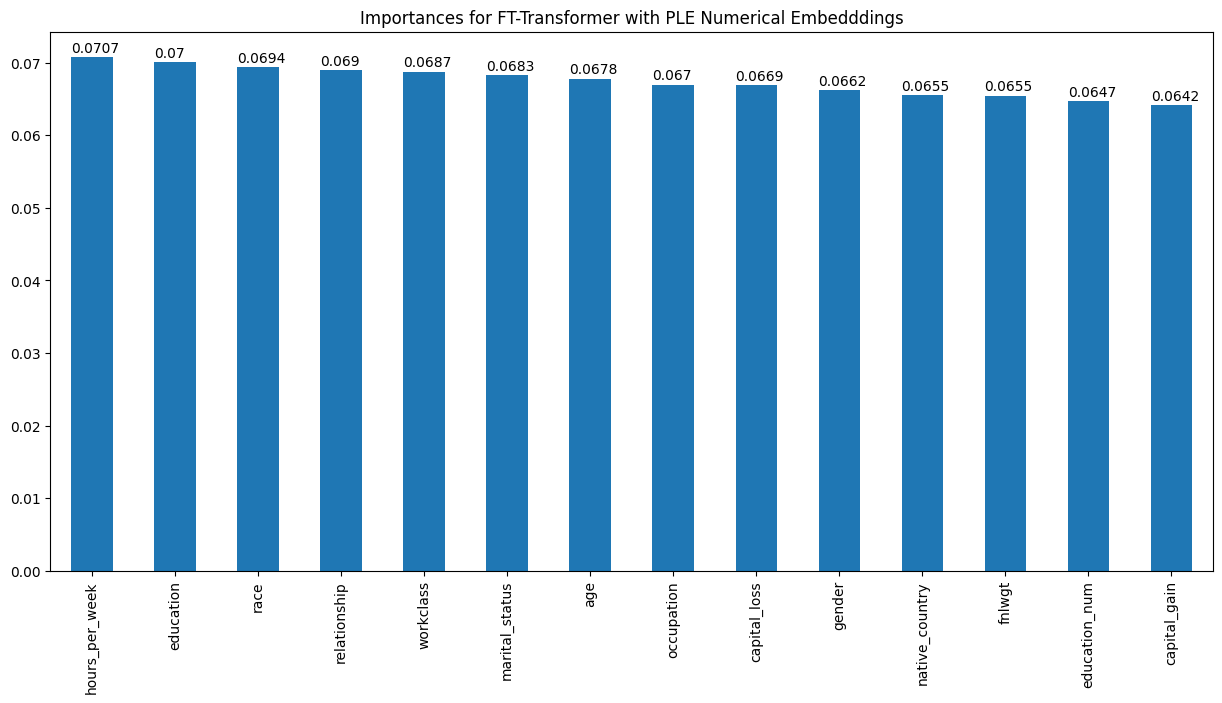

In [37]:
linear_total_importances = get_model_importances(
    linear_importances_df, title="Importances for FT-Transformer with PLE Numerical Embedddings"
)

In [38]:
# Largest prediction
max_idx = np.argsort(preds['output'].ravel())[-1]
example_importance_linear = linear_importances_df.iloc[max_idx, :].sort_values(ascending=False).rename("Importance").to_frame().join(
    X_test.iloc[max_idx, :].rename("Example Value")
).head(5)
print(f"Top 5 contributions to row {max_idx} which was scored {str(np.round(preds['output'].ravel()[max_idx], 4))}")
display(example_importance_linear)

# Smallest one
min_idx = np.argsort(preds['output'].ravel())[0]
example_importance_linear = linear_importances_df.iloc[min_idx, :].sort_values(ascending=False).rename("Importance").to_frame().join(
    X_test.iloc[min_idx, :].rename("Example Value")
).head(5)
print(f"Top 5 contributions to row {min_idx} which was scored {str(np.round(preds['output'].ravel()[min_idx], 4))}")
display(example_importance_linear)

Top 5 contributions to row 6013 which was scored 0.9897


,Importance,Example Value
capital_loss,0.088144,0
relationship,0.070031,Husband
workclass,0.069064,Self-emp-inc
hours_per_week,0.068722,90
occupation,0.068254,Exec-managerial


Top 5 contributions to row 7068 which was scored 0.0104


,Importance,Example Value
workclass,0.070910,State-gov
hours_per_week,0.069971,40
education,0.069669,Some-college
occupation,0.069501,Adm-clerical
relationship,0.068286,Not-in-family


## 4. Inferences

In [39]:
inputs = {
    'age': 25.0,
    'workclass': 'Private',
    'fnlwgt': 226802.0,
    'education': '11th',
    'education_num': 7.0,
    'marital_status': 'Never-married',
    'occupation': 'Machine-op-inspct',
    'relationship': 'Own-child',
    'race': 'black',
    'gender': 'Male',
    'capital_gain': 0.0,
    'capital_loss': 0.0,
    'hours_per_week': 40.0,
    'native_country': 'United-States',
    'income_bracket': ''
}

In [40]:
preds = model_ple.inference(inputs)
score = preds['output']
importance = preds['importances']

1/1 [==============================] - 11s 11s/step


In [41]:
importances_df = pd.DataFrame(importance[:, :-1], columns = FEATURES)

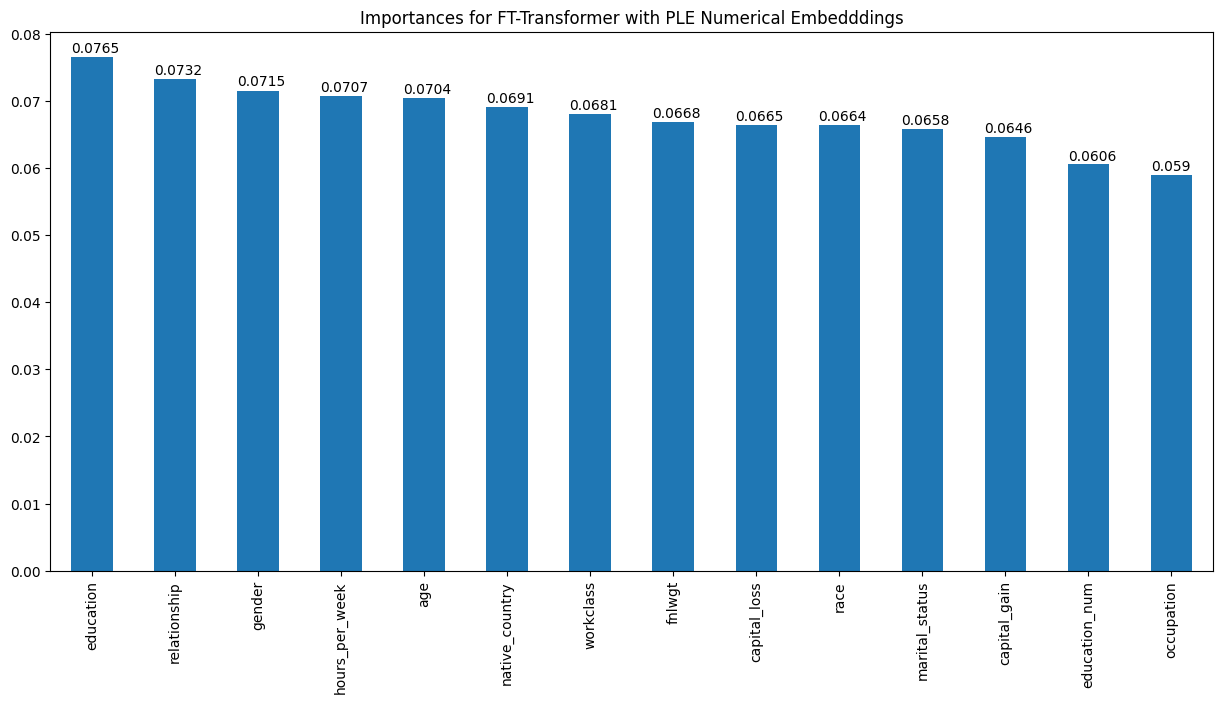

In [42]:
linear_total_importances = get_model_importances(
    importances_df, title="Importances for FT-Transformer with PLE Numerical Embedddings"
)

# C. Target Binning Approach

In [43]:
hypeparameter = load_config('setting/hyp_plet_fttransformer.yaml')

In [44]:
X_train= pd.read_csv(PATH_TRAIN)
X_val=pd.read_csv(PATH_VAL)
X_test=pd.read_csv(PATH_TEST)

In [46]:
model_plet = FT_Transformer(
   c_feature=CATEGORICAL_FEATURES, 
   n_feature=NUMERIC_FEATURES,
   X_train=X_train,
   hyperparameters=hypeparameter
)

## 1. Training

In [47]:
history = model_plet.train(
    train_data=X_train,
    val_data=X_val,
)

>> Training ................
Epoch 1/100
51/51 [==============================] - ETA: 0s - loss: 0.4777 - output_loss: 0.4777 - output_PR AUC: 0.4543
Epoch 1: saving model to artifact/weights/plet_fft_transform_1674656121.836691/
51/51 [==============================] - 35s 288ms/step - loss: 0.4777 - output_loss: 0.4777 - output_PR AUC: 0.4543 - val_loss: 0.4034 - val_output_loss: 0.4034 - val_output_PR AUC: 0.6143
Epoch 2/100
50/51 [============================>.] - ETA: 0s - loss: 0.3869 - output_loss: 0.3869 - output_PR AUC: 0.6208
Epoch 2: saving model to artifact/weights/plet_fft_transform_1674656121.836691/
51/51 [==============================] - 4s 67ms/step - loss: 0.3871 - output_loss: 0.3871 - output_PR AUC: 0.6222 - val_loss: 0.3720 - val_output_loss: 0.3720 - val_output_PR AUC: 0.6581
Epoch 3/100
51/51 [==============================] - ETA: 0s - loss: 0.3636 - output_loss: 0.3636 - output_PR AUC: 0.6685
Epoch 3: saving model to artifact/weights/plet_fft_transform_167465

## 2. Evaluation

In [48]:
model_plet.load_model('artifact/weights/plet_fft_transform_1674656121.836691/')

In [49]:
model_plet.test_model(test_data=X_test)

32/32 [==============================] - 11s 39ms/step
Test ROC AUC: 0.9122
Test PR AUC: 0.7864
Test Accuracy: 0.8592
F1 score: 0.7905
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12435
           1       0.75      0.61      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281



In [50]:
import pickle
import matplotlib.pyplot as plt
with open('artifact/history/plet_fft_transform_1674656121.836691.pkl', 'rb') as f:
    history = pickle.load(f)

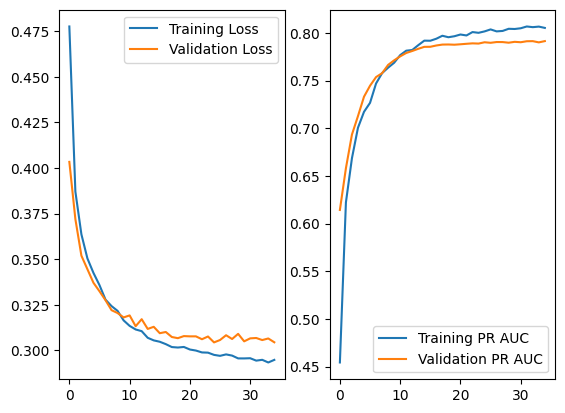

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(history['loss'], label='Training Loss')
ax[0].plot(history['val_loss'], label='Validation Loss')
ax[0].legend()

ax[1].plot(history['output_PR AUC'], label='Training PR AUC')
ax[1].plot(history['val_output_PR AUC'], label='Validation PR AUC')
ax[1].legend()

plt.show()


## 3. Explainable

In [52]:
model_plet.load_model('artifact/weights/plet_fft_transform_1674656121.836691/')

In [53]:
preds = model_plet.inference(X_test)

32/32 [==============================] - 12s 39ms/step


In [54]:
importances = preds['importances']

In [55]:
linear_importances_df = pd.DataFrame(importances[:, :-1], columns = FEATURES)

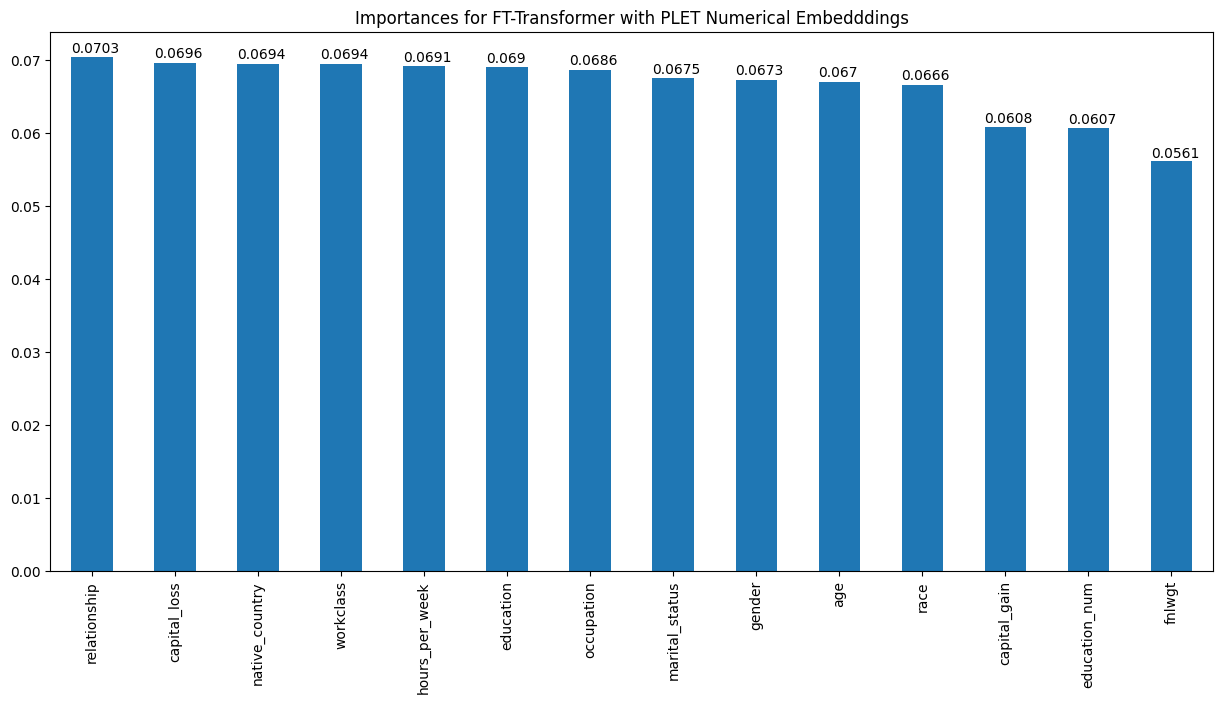

In [56]:
linear_total_importances = get_model_importances(
    linear_importances_df, title="Importances for FT-Transformer with PLET Numerical Embedddings"
)

In [57]:
# Largest prediction
max_idx = np.argsort(preds['output'].ravel())[-1]
example_importance_linear = linear_importances_df.iloc[max_idx, :].sort_values(ascending=False).rename("Importance").to_frame().join(
    X_test.iloc[max_idx, :].rename("Example Value")
).head(5)
print(f"Top 5 contributions to row {max_idx} which was scored {str(np.round(preds['output'].ravel()[max_idx], 4))}")
display(example_importance_linear)

# Smallest one
min_idx = np.argsort(preds['output'].ravel())[0]
example_importance_linear = linear_importances_df.iloc[min_idx, :].sort_values(ascending=False).rename("Importance").to_frame().join(
    X_test.iloc[min_idx, :].rename("Example Value")
).head(5)
print(f"Top 5 contributions to row {min_idx} which was scored {str(np.round(preds['output'].ravel()[min_idx], 4))}")
display(example_importance_linear)

Top 5 contributions to row 10471 which was scored 0.9681


,Importance,Example Value
capital_loss,0.096456,0
relationship,0.069599,Husband
workclass,0.068008,Self-emp-not-inc
education,0.067224,HS-grad
marital_status,0.065935,Married-civ-spouse


Top 5 contributions to row 13030 which was scored 0.0039


,Importance,Example Value
age,0.071829,21
occupation,0.070667,Sales
marital_status,0.069189,Never-married
workclass,0.067471,Private
native_country,0.067056,United-States


## 4. Inferences

In [58]:
inputs = {
    'age': 25.0,
    'workclass': 'Private',
    'fnlwgt': 226802.0,
    'education': '11th',
    'education_num': 7.0,
    'marital_status': 'Never-married',
    'occupation': 'Machine-op-inspct',
    'relationship': 'Own-child',
    'race': 'black',
    'gender': 'Male',
    'capital_gain': 0.0,
    'capital_loss': 0.0,
    'hours_per_week': 40.0,
    'native_country': 'United-States',
    'income_bracket': ''
}

In [59]:
preds = model_plet.inference(inputs)
score = preds['output']
importance = preds['importances']

1/1 [==============================] - 11s 11s/step


In [60]:
importances_df = pd.DataFrame(importance[:, :-1], columns = FEATURES)

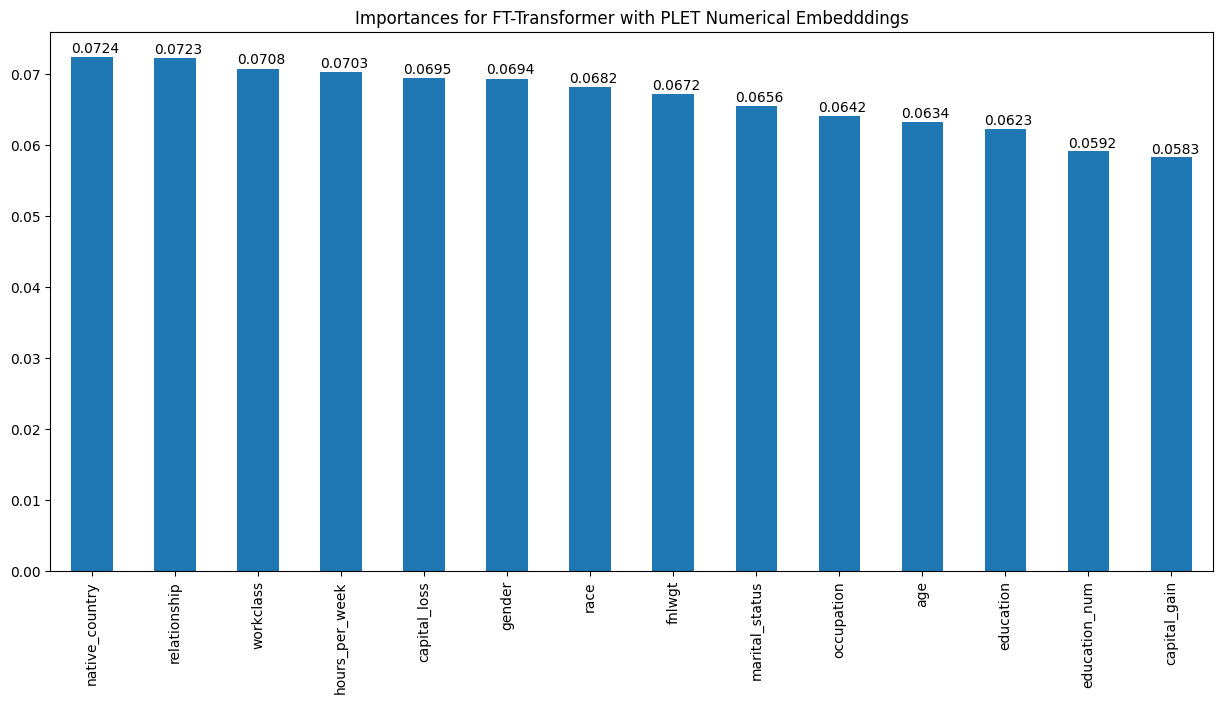

In [61]:
linear_total_importances = get_model_importances(
    importances_df, title="Importances for FT-Transformer with PLET Numerical Embedddings"
)